In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
plt.rcParams['font.family'] = 'SimHei'

In [55]:
from pvlib.iotools import get_pvgis_hourly

data, meta, inputs = get_pvgis_hourly(
    latitude=14.8149269,
    longitude=78.2862866,
    start=2020,
    end=2020,
    raddatabase='PVGIS-ERA5',
    surface_tilt=30,
    surface_azimuth=180,
    components=True,
    pvcalculation=True,
    peakpower=1000,   # 1MW 装机容量
    pvtechchoice='crystSi',
    mountingplace='free',
    loss=14,          # 14% 损耗
    outputformat='json',
    map_variables=True
)

print(data.columns)

Index(['P', 'poa_direct', 'poa_sky_diffuse', 'poa_ground_diffuse',
       'solar_elevation', 'temp_air', 'wind_speed', 'Int'],
      dtype='object')


In [57]:
data.index

DatetimeIndex(['2020-01-01 00:30:00+00:00', '2020-01-01 01:30:00+00:00',
               '2020-01-01 02:30:00+00:00', '2020-01-01 03:30:00+00:00',
               '2020-01-01 04:30:00+00:00', '2020-01-01 05:30:00+00:00',
               '2020-01-01 06:30:00+00:00', '2020-01-01 07:30:00+00:00',
               '2020-01-01 08:30:00+00:00', '2020-01-01 09:30:00+00:00',
               ...
               '2020-12-31 14:30:00+00:00', '2020-12-31 15:30:00+00:00',
               '2020-12-31 16:30:00+00:00', '2020-12-31 17:30:00+00:00',
               '2020-12-31 18:30:00+00:00', '2020-12-31 19:30:00+00:00',
               '2020-12-31 20:30:00+00:00', '2020-12-31 21:30:00+00:00',
               '2020-12-31 22:30:00+00:00', '2020-12-31 23:30:00+00:00'],
              dtype='datetime64[ns, UTC]', name='time', length=8784, freq=None)

In [59]:
data.index

DatetimeIndex(['2020-01-01 00:30:00+00:00', '2020-01-01 01:30:00+00:00',
               '2020-01-01 02:30:00+00:00', '2020-01-01 03:30:00+00:00',
               '2020-01-01 04:30:00+00:00', '2020-01-01 05:30:00+00:00',
               '2020-01-01 06:30:00+00:00', '2020-01-01 07:30:00+00:00',
               '2020-01-01 08:30:00+00:00', '2020-01-01 09:30:00+00:00',
               ...
               '2020-12-31 14:30:00+00:00', '2020-12-31 15:30:00+00:00',
               '2020-12-31 16:30:00+00:00', '2020-12-31 17:30:00+00:00',
               '2020-12-31 18:30:00+00:00', '2020-12-31 19:30:00+00:00',
               '2020-12-31 20:30:00+00:00', '2020-12-31 21:30:00+00:00',
               '2020-12-31 22:30:00+00:00', '2020-12-31 23:30:00+00:00'],
              dtype='datetime64[ns, UTC]', name='time', length=8784, freq=None)

In [63]:
#data = data.tz_localize('UTC')

# 2. 转换为 +05:30 时区
data = data.tz_convert('Asia/Kolkata')  # Asia/Kolkata是UTC+5:30
#fake_data = pd.to_datetime(data.index, format='%d-%m-%Y %H:%M')

# 现有数据

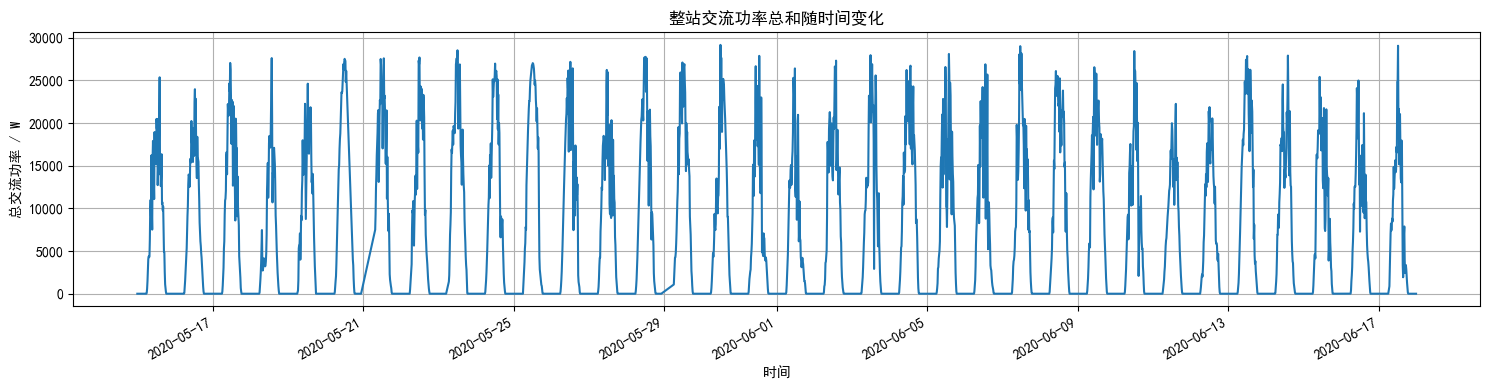

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取 CSV 文件（假设名为 'power_data.csv'）
real_data = pd.read_csv('D:/其他的事/25年电工杯/数据集/Plant_1_Generation_Data.csv/Plant_1_Generation_Data.csv')

# 将 DATE_TIME 转换为标准时间格式
real_data['DATE_TIME'] = pd.to_datetime(real_data['DATE_TIME'], format='%d-%m-%Y %H:%M')

# 按时间聚合（对所有逆变器的 AC_POWER 求和）
# 先确保 AC_POWER 是数值类型
real_data['AC_POWER'] = pd.to_numeric(real_data['AC_POWER'], errors='coerce')

# 按时间求和
agg_data = real_data.groupby('DATE_TIME')['AC_POWER'].sum()
# agg_data_hourly = agg_data.resample('1h').mean()  # 或 .sum()
# 绘图
agg_data.plot(figsize=(15, 4), title='整站交流功率总和随时间变化')
plt.xlabel('时间')
plt.ylabel('总交流功率 / W')
plt.grid(True)
plt.tight_layout()
plt.show()

In [85]:
agg_data_hourly = agg_data.resample('1h').sum()

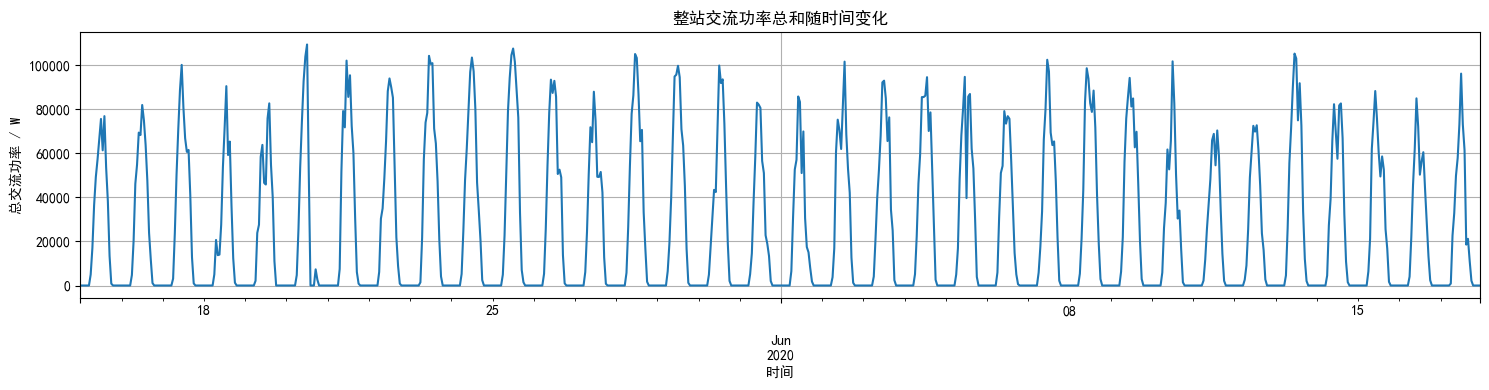

In [87]:
agg_data_hourly.plot(figsize=(15, 4), title='整站交流功率总和随时间变化')
plt.xlabel('时间')
plt.ylabel('总交流功率 / W')
plt.grid(True)
plt.tight_layout()
plt.show()

In [93]:
agg_data_hourly_utc = agg_data_hourly.tz_localize('Asia/Kolkata')

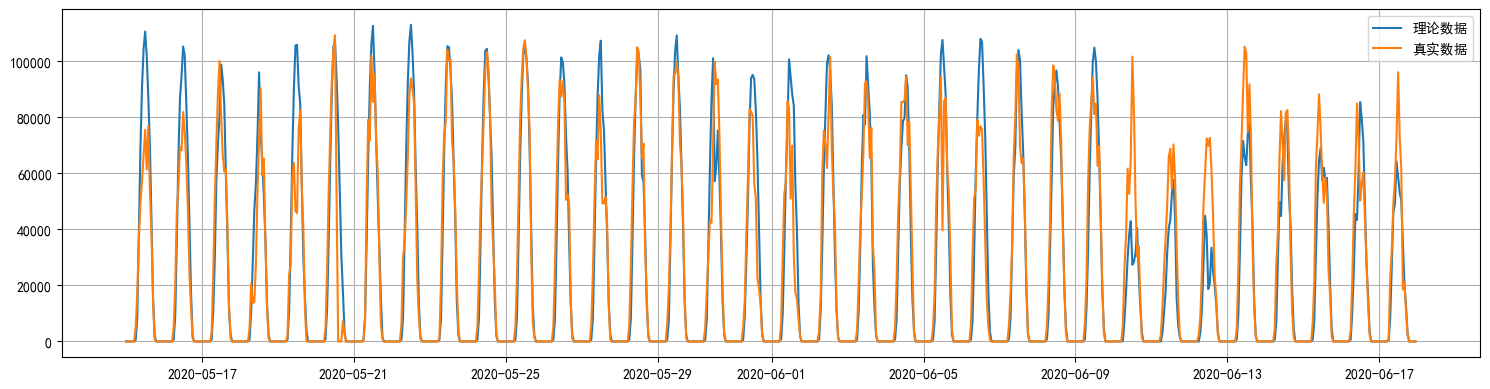

In [99]:
start = '2020-05-15'
end = '2020-06-17'
subset = data.loc[start:end]
subset_cut = subset / sum(subset['P'].values) * sum(agg_data_hourly)
plt.figure(figsize=(15, 4))
plt.plot(subset_cut.index, subset_cut['P'],label = '理论数据')
plt.plot(agg_data_hourly_utc.index,agg_data_hourly_utc,label = '真实数据')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [53]:
agg_data_hourly.index

DatetimeIndex(['2020-05-15 00:00:00', '2020-05-15 01:00:00',
               '2020-05-15 02:00:00', '2020-05-15 03:00:00',
               '2020-05-15 04:00:00', '2020-05-15 05:00:00',
               '2020-05-15 06:00:00', '2020-05-15 07:00:00',
               '2020-05-15 08:00:00', '2020-05-15 09:00:00',
               ...
               '2020-06-17 14:00:00', '2020-06-17 15:00:00',
               '2020-06-17 16:00:00', '2020-06-17 17:00:00',
               '2020-06-17 18:00:00', '2020-06-17 19:00:00',
               '2020-06-17 20:00:00', '2020-06-17 21:00:00',
               '2020-06-17 22:00:00', '2020-06-17 23:00:00'],
              dtype='datetime64[ns]', name='DATE_TIME', length=816, freq='h')

In [51]:
subset_cut.index

DatetimeIndex(['2020-05-15 00:00:00+05:30', '2020-05-15 01:00:00+05:30',
               '2020-05-15 02:00:00+05:30', '2020-05-15 03:00:00+05:30',
               '2020-05-15 04:00:00+05:30', '2020-05-15 05:00:00+05:30',
               '2020-05-15 06:00:00+05:30', '2020-05-15 07:00:00+05:30',
               '2020-05-15 08:00:00+05:30', '2020-05-15 09:00:00+05:30',
               ...
               '2020-06-17 14:00:00+05:30', '2020-06-17 15:00:00+05:30',
               '2020-06-17 16:00:00+05:30', '2020-06-17 17:00:00+05:30',
               '2020-06-17 18:00:00+05:30', '2020-06-17 19:00:00+05:30',
               '2020-06-17 20:00:00+05:30', '2020-06-17 21:00:00+05:30',
               '2020-06-17 22:00:00+05:30', '2020-06-17 23:00:00+05:30'],
              dtype='datetime64[ns, Asia/Kolkata]', name='time', length=816, freq=None)

In [101]:
subset_cut['P'].corr(agg_data_hourly_utc)

0.9283698041435451

# 指标

In [126]:
import numpy as np

y_true = agg_data_hourly_utc.values  # 真实值
y_pred = subset_cut['P'].values  # 预测值

mae = np.mean(np.abs(y_true - y_pred))
mape = np.mean(np.abs(y_true - y_pred) / (np.abs(y_true) + 1))
pr = np.sum(y_pred) / np.sum(y_true)

print(f"MAE: {mae:.4f}, MAPE: {mape:.4%}, Performance Ratio: {pr:.8f}")

MAE: 6901.0877, MAPE: 20031.0692%, Performance Ratio: 1.00000000


## 趋势分析


### 日内

In [166]:
data.index.month

Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       ...
       12, 12, 12, 12,  1,  1,  1,  1,  1,  1],
      dtype='int32', name='time', length=8784)

<Axes: title={'center': '年特征'}, xlabel='month', ylabel='发电量（W）'>

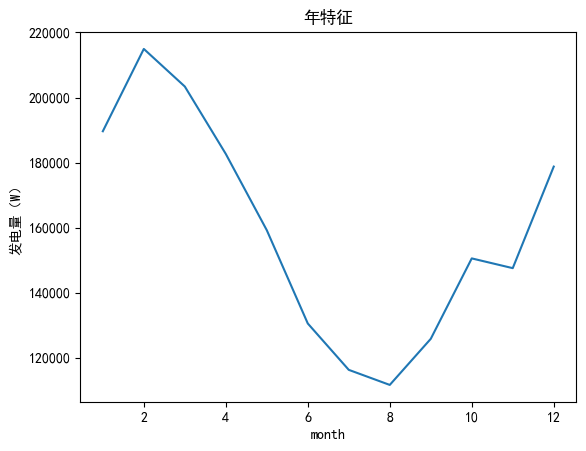

In [168]:
data['month'] = data.index.month
mean_daily = data.groupby('month')['P'].mean()
mean_daily.plot(title='年特征', ylabel='发电量（W）')

In [186]:
from pvlib.iotools import get_pvgis_hourly

data2, meta2, inputs2 = get_pvgis_hourly(
    latitude=14.8149269,
    longitude=78.2862866,
    start=2015,
    end=2023,
    raddatabase='PVGIS-ERA5',
    surface_tilt=30,
    surface_azimuth=180,
    components=True,
    pvcalculation=True,
    peakpower=1000,   # 1MW 装机容量
    pvtechchoice='crystSi',
    mountingplace='free',
    loss=14,          # 14% 损耗
    outputformat='json',
    map_variables=True
)

print(data.columns)

Index(['P', 'poa_direct', 'poa_sky_diffuse', 'poa_ground_diffuse',
       'solar_elevation', 'temp_air', 'wind_speed', 'Int', 'hour', 'month'],
      dtype='object')


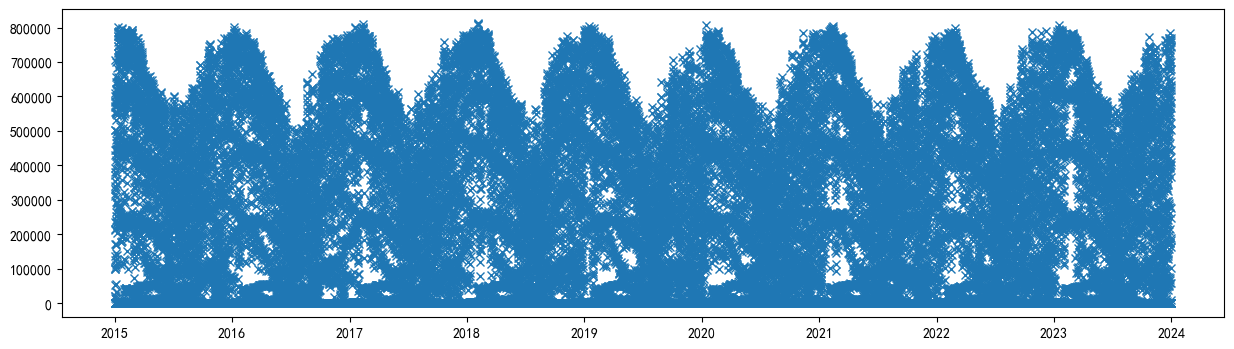

In [192]:
plt.figure(figsize=(15, 4))
plt.plot(data2.index, data2['P'],'x')
plt.show()

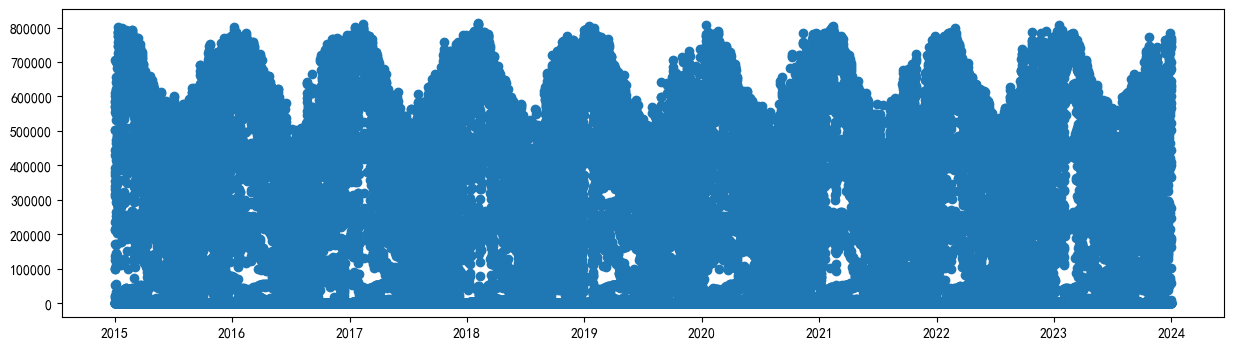

In [190]:
plt.figure(figsize=(15, 4))
plt.scatter(data2.index, data2['P'])
plt.show()

In [200]:
data2['P_kWh'] = data['P'] / 1000

data2['month'] = data2.index.month

# 按月求和：每月总发电量（单位：kWh）
monthly_energy = data2.groupby('month')['P_kWh'].sum()

# 排序打印
print(monthly_energy.sort_values(ascending=False))


month
3     151316.41
2     149598.40
1     141076.70
12    132990.25
4     131504.55
5     118437.22
10    111984.58
11    106213.07
6      93962.11
9      90561.61
7      86482.77
8      83035.48
Name: P_kWh, dtype: float64


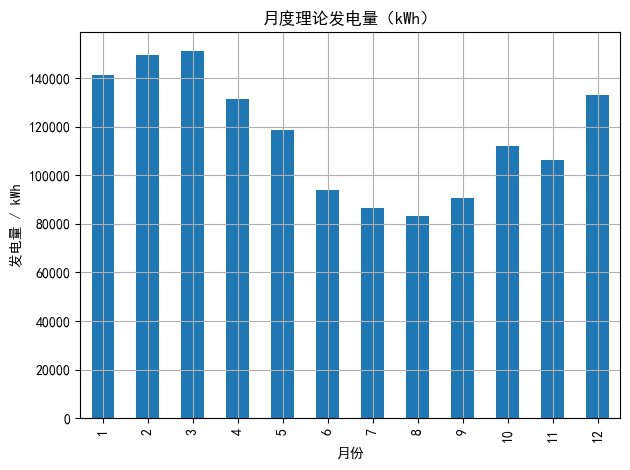

In [212]:
monthly_energy.plot(kind='bar', title='月度理论发电量（kWh）')
plt.xlabel('月份')
plt.ylabel('发电量 / kWh')
plt.grid(True)
plt.tight_layout()
plt.show()

In [208]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设 data 是 PVGIS 返回的数据，index 是 datetime（含全年数据）

# 添加月份列
data2['month'] = data2.index.month

# 计算月平均气温（单位：°C）
monthly_temp = data2.groupby('month')['temp_air'].mean()

# 计算月平均太阳高度角（单位：度）
monthly_elevation = data2.groupby('month')['solar_elevation'].mean()

# 计算月平均 POA（入射辐照强度，单位：W/m²）
data2['poa_total'] = data2['poa_direct'] + data2['poa_sky_diffuse']
monthly_poa = data2.groupby('month')['poa_total'].mean()

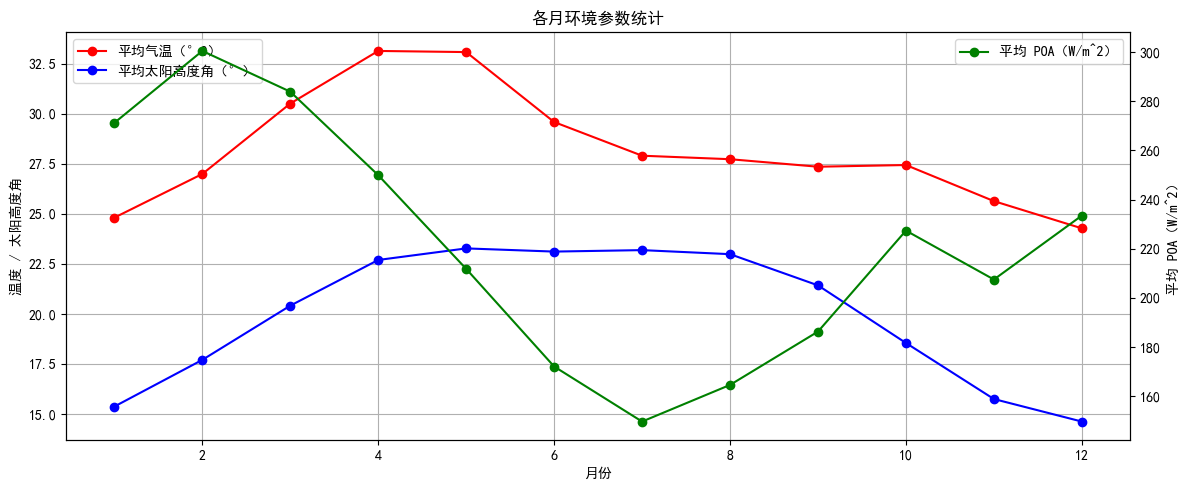

In [218]:
fig, ax1 = plt.subplots(figsize=(12, 5))

# 左轴：气温和太阳高度角
ax1.plot(monthly_temp.index, monthly_temp.values, 'r-o', label='平均气温（°C）')
ax1.plot(monthly_elevation.index, monthly_elevation.values, 'b-o', label='平均太阳高度角（°）')
ax1.set_xlabel('月份')
ax1.set_ylabel('温度 / 太阳高度角')
ax1.legend(loc='upper left')
ax1.grid(True)

# 右轴：POA 辐照强度
ax2 = ax1.twinx()
ax2.plot(monthly_poa.index, monthly_poa.values, 'g-o', label='平均 POA（W/m^2）')
ax2.set_ylabel('平均 POA（W/m^2）')
ax2.legend(loc='upper right')

plt.title('各月环境参数统计')
plt.tight_layout()
plt.show()
